<a href="https://colab.research.google.com/github/Vikrampothireedy/SQL/blob/main/Marketing_Project_on_Walmart_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Project on Walmart Dataset**

# **1. Understanding the Dataset and Data Vairables**

1.1 Importing Packages and reading the dataset


In [17]:
# Importing  All required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Reading the CSV of Walmart dataset

import pandas as pd
walmart_dataset = pd.read_csv('/content/Walmart-Retail-Dataset.csv', on_bad_lines='skip')


<ipython-input-18-6d9270bf3f8c>:4: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  walmart_dataset = pd.read_csv('/content/Walmart-Retail-Dataset.csv', on_bad_lines='skip')


In [19]:
# Summary of dataset info
walmart_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019587 entries, 0 to 1019586
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   city                  1019580 non-null  object 
 1   customer_age          1019587 non-null  object 
 2   customer_name         1019573 non-null  object 
 3   customer_segment      1017048 non-null  object 
 4   discount              1019587 non-null  object 
 5   order_date            1019587 non-null  object 
 6   order_id              1019587 non-null  object 
 7   order_priority        1017475 non-null  object 
 8   order_quantity        1019587 non-null  object 
 9   product_base_margin   1019587 non-null  object 
 10  product_category      1019587 non-null  object 
 11  product_container     1014853 non-null  object 
 12  product_name          1014842 non-null  object 
 13  product_sub_category  1014853 non-null  object 
 14  profit                1014853 non-

1.2 Data Vairables Explanation:


A leading retail company wants to streamline its operations by making informed decisions on customer behavior, sales trends, and product performances. The dataset comprises transactional information on orders, customer demographics, product attributes, and shipment details. This company has to grapple with challenges associated with profit margins, inventory management, and personalized customer experience. Insights into sales performance, regional demand, and customer feedback will inform strategic decisions.

The data represents several products and product subcategories and outlines order priorities, shipping cost, and profit margins. There are also special promotions and discounts affecting the sales trend, for which proper appraisal of their impact is required. Regional differences, customer segments, and shipping modes are critical factors that influence performance.  

The business would like to use this dataset to:
 1. **Forecast Demand**: Provide an accurate forecast of the order quantity and identify high-demand products.
2. **Enhance Profitability**: Analyze profit margins and prioritize high-margin products.  
3. **Improve Customer Satisfaction**: Use feedback comments and shipping performance to optimize the customer experience.  
4. **Optimize Inventory**: Minimize stockouts and overstock situations by understanding regional sales trends.  

This data provides a foundation for addressing these challenges and developing machine learning models to predict demand, assess promotional effectiveness, and tailor offerings to customer preferences.


| **Column Name**         | **Description**                                                                 |
|--------------------------|---------------------------------------------------------------------------------|
| **city**                | City where the customer resides or the order is shipped.                       |
| **customer_age**        | Age of the customer who makes the transaction.                                       |
| **customer_name**       | Customer Name.                                                         |
| **customer_segment**    | Category of the customer, for example corporate or retail.                           |
| **discount**            | Discount applied to the order.                                                |
| **order_date**          | The date on which the order was placed.                                               |
| **order_id**            | Unique identifier for each order.                                             |
| **order_priority**      | Priority level of the order, e.g., High, Medium, Low.                          |
| **order_quantity**      | Quantity of items ordered.                                                    |
| **product_base_margin** | Profit margin percentage on the product.                                      |
| **product_category**    | Broad category of the product, e.g., electronics or furniture.                |
| **product_container**   | Container type or packaging of the product.                               |
| **product_name**        | Name of the product ordered.                                                  |
| **product_sub_category**| Specific categorization of the product.                                       |
| **profit**              | Profit made from the order.                                              |
| **region**              | Geographic region of the customer or delivery.                                |
| **sales**               | Total sales amount of the order.                                             |
| **ship_date**           | Date on which the order was shipped.                                             |
| **ship_mode**           | Shipping mode selected for order, for example Standard or Express.              |
| **shipping_cost**       | Cost incurred for shipping.                                                   |
| **state**               | State where customer resides or the order was shipped.                    |
| **unit_price**          | Price per unit of the product.                                                |
| **zip_code**            | Postal/ZIP code of the delivery location.                                    |
| **feedback_comment**    | Feedback given by customers regarding their order or product.                     |



In [20]:
 # Summary statistics for numerical columns
walmart_dataset.describe()


,profit
count,1.014853e+06
mean,6.561751e+03
std,1.194205e+04
min,-1.413988e+04
25%,-3.779742e+03
50%,6.584702e+03
75%,1.690123e+04
max,2.721999e+04


In [21]:
# View first 10 rows
walmart_dataset.head(10)

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code,feedback_comment
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,19559.92268,Central,21.84,2020-03-02,Delivery Truck,3.772509354070991,Wisconsin,3.29,54481.0,"Excellent customer service, I had a great shop..."
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,19559.92268,Central,1811.67,2020-03-07,Delivery Truck,816.3408935057945,Wisconsin,258.98,54481.0,Very disappointed with the quality of the prod...
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,7535.93880,Central,6129.06,2021-11-15,Delivery Truck,4530.505983276593,Texas,145.98,76051.0,"I waited too long for delivery, and the produc..."
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,18860.92419,West,198.9,2020-08-08,Regular Air,128.73150520457037,Arizona,6.68,85281.0,Fantastic price for the quality. Will definite...
4,Coconut Creek,80,Raymond Fair,Home Office,0.14,2021-08-13,8fd6c0f6-9e28-45b5-ba21-a57021ae304d,Low,44,\N,...,24750.49210,South,1875.28,2021-08-18,Express Air,33.60838488294798,Florida,42.76,33063.0,Very disappointed with the quality of the prod...
5,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,20175.51620,East,243.97,2020-09-30,Express Air,17.8110726726392,Ohio,8.12,43221.0,The item was broken upon arrival. Not happy wi...
6,Pensacola,38,Cyra Reiten,Home Office,0.09,2020-12-18,d6f06523-ad86-4879-a7e3-a4c297ec97d2,Low,29,0.56,...,2452.54839,South,48.43,2020-12-20,Regular Air,39.29971318775751,Florida,1.76,32503.0,Customer service was unhelpful. Will not buy a...
7,Pullman,25,Christine Kargatis,Consumer,0.04,2021-07-24,3a392558-662f-4e3c-b1ec-71e90464b9b2,Critical,16,0.75,...,-2751.15991,West,1935.04,2021-07-28,Express Air,1647.093036118138,Washington,120.98,99163.0,"The product didn’t work as described, and I ha..."
8,Newnan,43,Scott Williamson,Home Office,0.25,2019-01-11,3595fa4c-37b0-43ce-ad59-b6db7beea80a,High,16,0.42,...,11753.43685,South,462.88,2019-01-19,Regular Air,397.5219740027339,Georgia,29.18,30265.0,Very disappointed with the quality of the prod...
9,Oxnard,80,Dennis Pardue,Consumer,0.13,2022-12-13,9e1e6030-1da0-4289-9045-7ccf4d3c79b6,Not Specified,38,0.36,...,13013.62950,West,380.38,2022-12-17,Delivery Truck,320.77603961373705,California,10.14,93030.0,The item was broken upon arrival. Not happy wi...


# **2. Data Cleaning**



2.1 Checking the  Missing Values






In [22]:
# Check for any missing values in each column and
print(walmart_dataset.isnull().any())


city                     True
customer_age            False
customer_name            True
customer_segment         True
discount                False
order_date              False
order_id                False
order_priority           True
order_quantity          False
product_base_margin     False
product_category        False
product_container        True
product_name             True
product_sub_category     True
profit                   True
region                   True
sales                    True
ship_date                True
ship_mode                True
shipping_cost            True
state                    True
unit_price               True
zip_code                 True
feedback_comment         True
dtype: bool


In [23]:
#calculting only missing values using a function
def FindMissingColPercent(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    if total == 0:
        print("no missing values")
FindMissingColPercent(walmart_dataset)


city => 7 [0.0%]
customer_name => 14 [0.0%]
customer_segment => 2539 [0.25%]
order_priority => 2112 [0.21%]
product_container => 4734 [0.46%]
product_name => 4745 [0.47%]
product_sub_category => 4734 [0.46%]
profit => 4734 [0.46%]
region => 4734 [0.46%]
sales => 4734 [0.46%]
ship_date => 4734 [0.46%]
ship_mode => 8157 [0.8%]
shipping_cost => 4734 [0.46%]
state => 4734 [0.46%]
unit_price => 4734 [0.46%]
zip_code => 4734 [0.46%]
feedback_comment => 1000 [0.1%]


In [24]:
#identifying datatype, percentage of missing values and unique values in dataset
def sniff_modi(df):
    with pd.option_context("display.max_colwidth", 40):
        info = pd.DataFrame()
        info['data_type'] = df.dtypes
        info['per. missing'] = df.isnull().sum() * 100 / len(df)
        info['No. of unique'] = df.nunique()
        info['unique values'] = df.apply(lambda x: x.unique() if len(x.unique()) <=10 else list(x.unique())[:5] + ['...'])
        return info.sort_values('data_type')

In [25]:
sniff_modi(walmart_dataset)

,data_type,per. missing,No. of unique,unique values
profit,float64,0.464306,968239,"[19559.92268, 7535.9388, 18860.92419, 24750.49..."
city,object,0.000687,6155,"[Stevens Point, Grapevine, Tempe, Coconut Cree..."
unit_price,object,0.464306,730,"[3.29, 258.98, 145.98, 6.68, 42.76, ...]"
state,object,0.464306,49,"[Wisconsin, Texas, Arizona, Florida, Ohio, ...]"
shipping_cost,object,0.464306,1010931,"[3.772509354070991, 816.3408935057945, 4530.50..."
ship_mode,object,0.800030,3,"[Delivery Truck, Regular Air, Express Air, nan]"
ship_date,object,0.464306,1479,"[2020-03-02, 2020-03-07, 2021-11-15, 2020-08-0..."
sales,object,0.464306,192374,"[21.84, 1811.67, 6129.06, 198.9, 1875.28, ...]"
region,object,0.464306,6,"[Central, West, South, East, nan, 40.2, \N]"
product_sub_category,object,0.464306,17,"[Chairs & Chairmats, Tables, Paper, Storage & ..."


In [26]:
# Unique values for each feature
walmart_dataset.nunique().sort_values()

,0
ship_mode,3
product_category,4
customer_segment,5
region,6
order_priority,6
product_container,8
feedback_comment,15
product_sub_category,17
discount,27
state,49




2.2 Handling Missing values using mode,mean,No feedback,Unknown,Anonymous





In [27]:
for col in walmart_dataset.columns:
    if walmart_dataset[col].dtype == 'object':  # Categorical columns
        mode_val = walmart_dataset[col].mode()[0]
        walmart_dataset[col] = walmart_dataset[col].fillna(mode_val)
    elif pd.api.types.is_numeric_dtype(walmart_dataset[col]):  # Numerical columns
        mean_val = walmart_dataset[col].mean()
        walmart_dataset[col] = walmart_dataset[col].fillna(mean_val)
    elif col == 'feedback_comment': # Textual data
        walmart_dataset[col] = walmart_dataset[col].fillna('No feedback')
    elif col == 'city':
        walmart_dataset[col] = walmart_dataset[col].fillna('Unknown')
    elif col == 'customer_name':
        walmart_dataset[col] = walmart_dataset[col].fillna('Anonymous')


In [28]:
# Verifying  the  missing values still exist after handling
print(walmart_dataset.isnull().sum())

city                    0
customer_age            0
customer_name           0
customer_segment        0
discount                0
order_date              0
order_id                0
order_priority          0
order_quantity          0
product_base_margin     0
product_category        0
product_container       0
product_name            0
product_sub_category    0
profit                  0
region                  0
sales                   0
ship_date               0
ship_mode               0
shipping_cost           0
state                   0
unit_price              0
zip_code                0
feedback_comment        0
dtype: int64


In [29]:
# Check for duplicates
duplicates = walmart_dataset.duplicated()
if duplicates.any():
    print("Duplicate rows exist in the DataFrame.")
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.




2.3  Convert the given vairables to correct  Data Types




In [32]:
#Steps for conveting to Correct Data types
# 1. Converting `customer_age` to numeric (int or float), handling non-numeric values as NaN
walmart_dataset['customer_age'] = pd.to_numeric(walmart_dataset['customer_age'], errors='coerce')

# 2. Converting `order_date` and `ship_date` to datetime, handling invalid dates as NaT
walmart_dataset['order_date'] = pd.to_datetime(walmart_dataset['order_date'], errors='coerce')
walmart_dataset['ship_date'] = pd.to_datetime(walmart_dataset['ship_date'], errors='coerce')

# 3. Handling `order_quantity`
# Step 1: Convert to numeric, coercing errors to NaN
walmart_dataset['order_quantity'] = pd.to_numeric(walmart_dataset['order_quantity'], errors='coerce')

# Step 2: Fill NaN values with a default integer value (e.g., 0) and convert to int64
walmart_dataset['order_quantity'] = walmart_dataset['order_quantity'].fillna(0).astype('int64')

# 4. Converting numeric columns with potential decimals to float64
numeric_columns = ['product_base_margin', 'profit', 'sales', 'shipping_cost', 'unit_price']
for column in numeric_columns:
    walmart_dataset[column] = pd.to_numeric(walmart_dataset[column], errors='coerce').astype('float64')

# 5. Converting categorical variables to 'category' type for better memory usage and performance
categorical_columns = [
    'city', 'customer_segment', 'order_priority', 'product_category',
    'product_container', 'product_name', 'product_sub_category',
    'region', 'ship_mode', 'state', 'zip_code', 'feedback_comment'
]

for column in categorical_columns:
    if column in walmart_dataset.columns:
        walmart_dataset[column] = walmart_dataset[column].astype('category')

# Verify the data types after conversion
print(walmart_dataset.dtypes)

# Optional: Save the cleaned dataset to a new CSV file
walmart_dataset.to_csv("cleaned_walmart_dataset.csv", index=False)


city                          category
customer_age                   float64
customer_name                   object
customer_segment              category
discount                        object
order_date              datetime64[ns]
order_id                        object
order_priority                category
order_quantity                   int64
product_base_margin            float64
product_category              category
product_container             category
product_name                  category
product_sub_category          category
profit                         float64
region                        category
sales                          float64
ship_date               datetime64[ns]
ship_mode                     category
shipping_cost                  float64
state                         category
unit_price                     float64
zip_code                      category
feedback_comment              category
dtype: object




2.4 Identify numerical columns for outlier detection , Plotting outliers and Handling outliers





Outliers in customer_age: None
Outliers in order_quantity: None
Outliers in product_base_margin: None
Outliers in profit: None
Outliers in sales: Detected
Outliers in shipping_cost: Detected
Outliers in unit_price: Detected


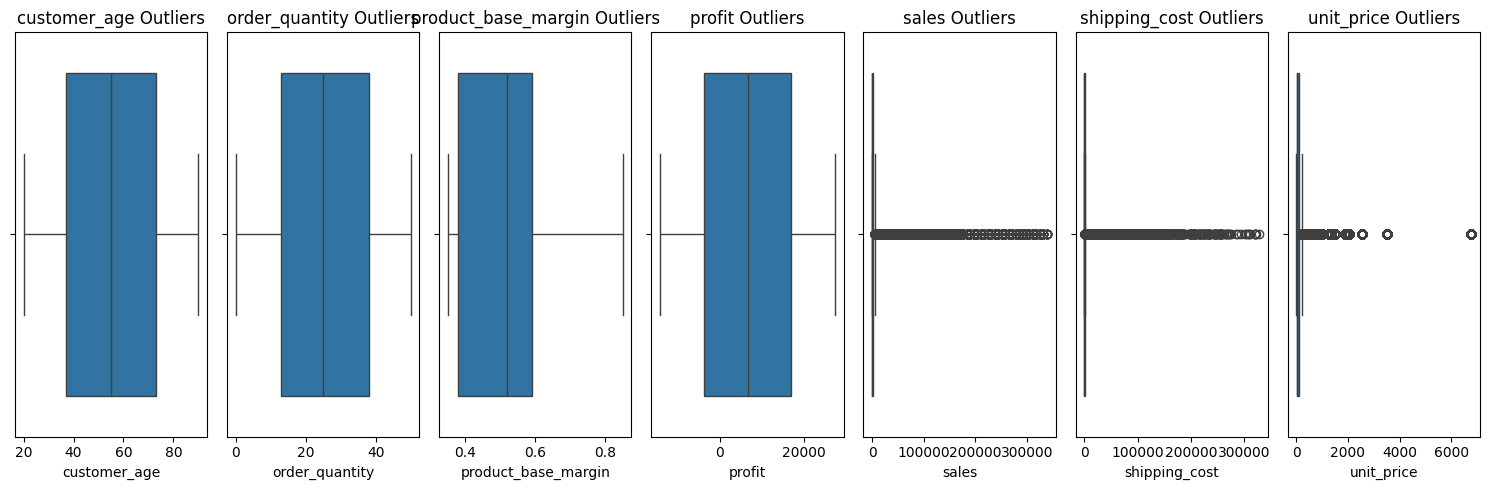

In [33]:
# Identify numerical columns for outlier detection
numerical_cols = walmart_dataset.select_dtypes(include=['number']).columns

# Checking for outliers using IQR and visualizing with boxplots
plt.figure(figsize=(15, 5))  # Adjust figure size based on the number of columns
for i, col in enumerate(numerical_cols):
    # Calculate IQR and outliers
    Q1 = walmart_dataset[col].quantile(0.25)
    Q3 = walmart_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = walmart_dataset[(walmart_dataset[col] < lower_bound) | (walmart_dataset[col] > upper_bound)]

    # Print outliers information
    print(f"Outliers in {col}: {'Detected' if not outliers.empty else 'None'}")

    # Create boxplot for each numerical column
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(x=walmart_dataset[col])
    plt.title(f'{col} Outliers')

plt.tight_layout()
plt.show()


In [34]:
# Handling outliers using IQR method
for col in numerical_cols:
    Q1 = walmart_dataset[col].quantile(0.25)
    Q3 = walmart_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    walmart_dataset[col] = walmart_dataset[col].clip(lower=lower_bound, upper=upper_bound)

Outliers in customer_age:
None
Outliers in order_quantity:
None
Outliers in product_base_margin:
None
Outliers in profit:
None
Outliers in sales:
None
Outliers in shipping_cost:
None
Outliers in unit_price:
None


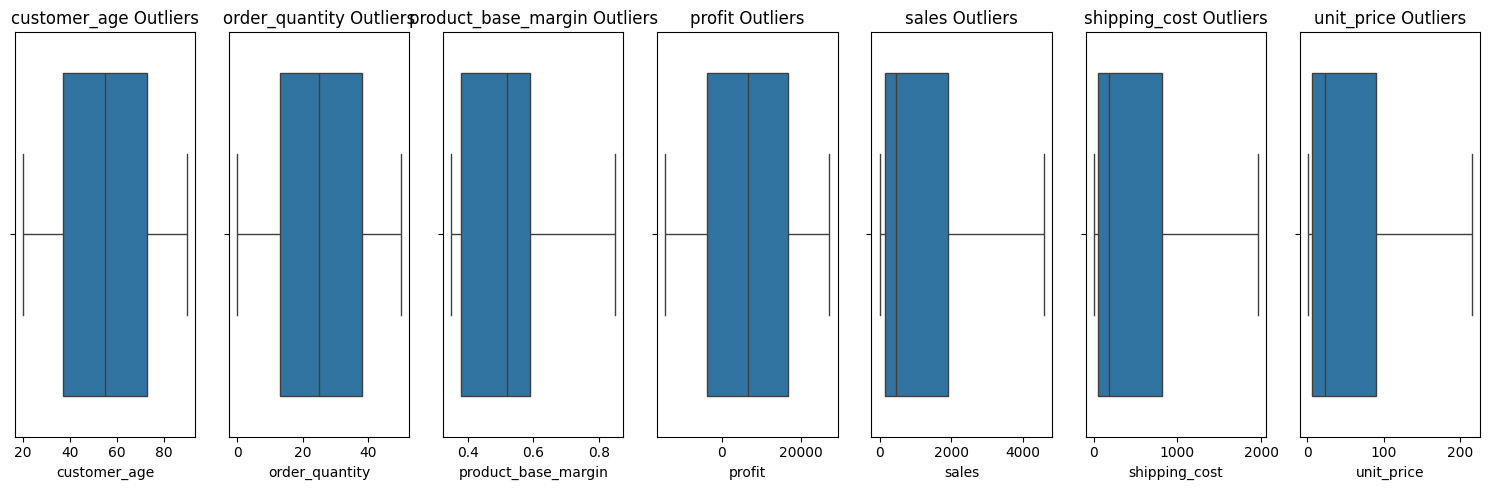

In [35]:
# verify outliers after Handling the outlier  the

# Identify numerical columns for outlier detection
numerical_cols = walmart_dataset.select_dtypes(include=['number']).columns

# Checking for outliers using IQR and visualizing with boxplots
plt.figure(figsize=(15, 5))  # Adjust figure size based on the number of columns
for i, col in enumerate(numerical_cols):
    # Calculate IQR and outliers
    Q1 = walmart_dataset[col].quantile(0.25)
    Q3 = walmart_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = walmart_dataset[(walmart_dataset[col] < lower_bound) | (walmart_dataset[col] > upper_bound)]

    # Print outliers information
    print(f"Outliers in {col}:")
    if not outliers.empty:
        print(outliers) # Print the actual outlier values
    else:
        print("None")

    # Create boxplot for each numerical column
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(x=walmart_dataset[col])
    plt.title(f'{col} Outliers')

plt.tight_layout()
plt.show()

In [36]:
#checking columns names
walmart_dataset.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'feedback_comment'],
      dtype='object')

In [37]:
# Convert DD-MM-YYYY into YYYY-MM-DD format

walmart_dataset["order_date"] = pd.to_datetime(walmart_dataset["order_date"], errors='coerce')
walmart_dataset["ship_date"] = pd.to_datetime(walmart_dataset["ship_date"], errors='coerce')

print("Column 'order_date' data type:", walmart_dataset["order_date"].dtypes)
print("Column 'ship_date' data type:", walmart_dataset["ship_date"].dtypes)

Column 'order_date' data type: datetime64[ns]
Column 'ship_date' data type: datetime64[ns]




2.5 .Feature Engineering :


In [38]:
# Creating a Days to Ship column to See if faster shipping leads to higher profits
walmart_dataset['Days_to_Ship'] = (walmart_dataset['ship_date'] - walmart_dataset['order_date']).dt.days

# Handling negative values (if any) - replace with 0
walmart_dataset['Days_to_Ship'] = walmart_dataset['Days_to_Ship'].clip(lower=0)



In [39]:
print(walmart_dataset[['order_date', 'ship_date', 'Days_to_Ship']].head(10))

  order_date  ship_date  Days_to_Ship
0 2020-02-29 2020-03-02             2
1 2020-02-29 2020-03-07             7
2 2021-11-11 2021-11-15             4
3 2020-08-02 2020-08-08             6
4 2021-08-13 2021-08-18             5
5 2020-09-26 2020-09-30             4
6 2020-12-18 2020-12-20             2
7 2021-07-24 2021-07-28             4
8 2019-01-11 2019-01-19             8
9 2022-12-13 2022-12-17             4


In [40]:
#Chekcing the columns to veriy the Days_to_Ship is added to dataset or not
walmart_dataset.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code', 'feedback_comment', 'Days_to_Ship'],
      dtype='object')

# Data Cleaning Summary

1. Handling Missing Values:
- Identification and imputation of missing values across all columns.
- Categorical columns - imputed with mode.
- Numerical columns - imputed with mean.
- 'feedback_comment', 'city', 'customer_name' - imputed with 'No feedback', 'Unknown', 'Anonymous' respectively.

2. Data Type Conversion:
- Applied the appropriate data types, numeric, datetime, category on respective columns.Doing this ensures the integrity of the data and makes analysis easy.

3. Outlier Detection and Handling:
- Outliers in numeric features were found using the IQR method.
- A boxplot was drawn to understand where the outliers were lying.
- Outliers were replaced with upper and lower bound calculated from IQR.

4. Feature Engineering:Below is the additional code for the preprocessing of the data:
- Created a new 'Days_to_Ship' feature by calculating the difference between 'ship_date' and 'order_date'.
- Handled potential negative values in 'Days_to_Ship' by clipping them to 0.


# **3.Exploratory Data Analysis (EDA)**



3.1 Univariate Analysis for Numerical Features





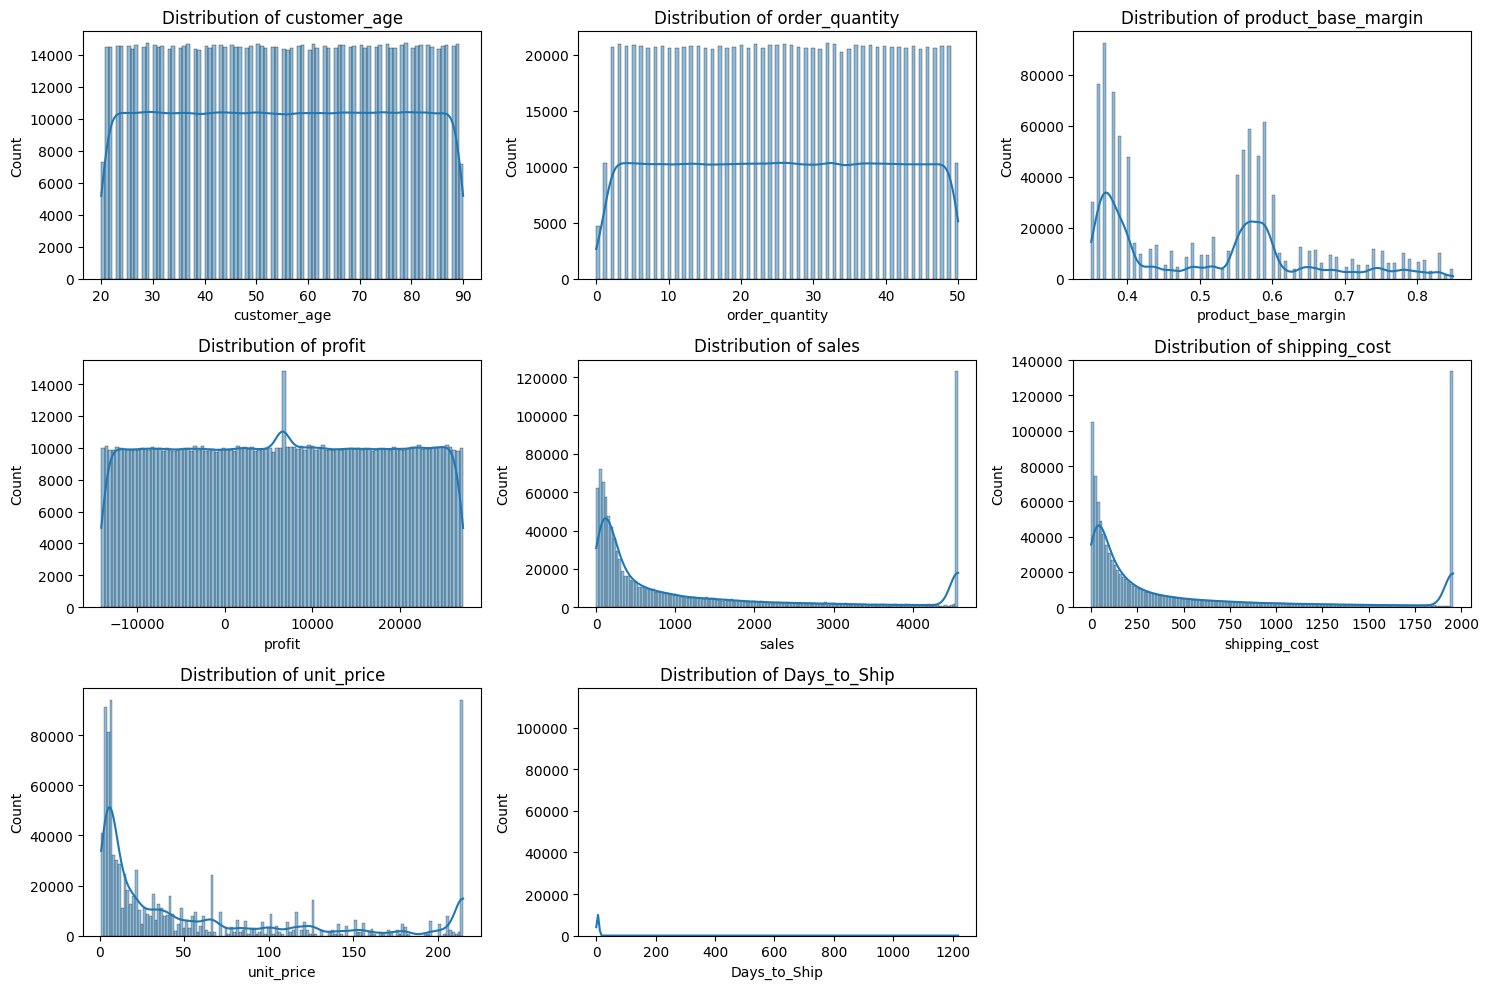

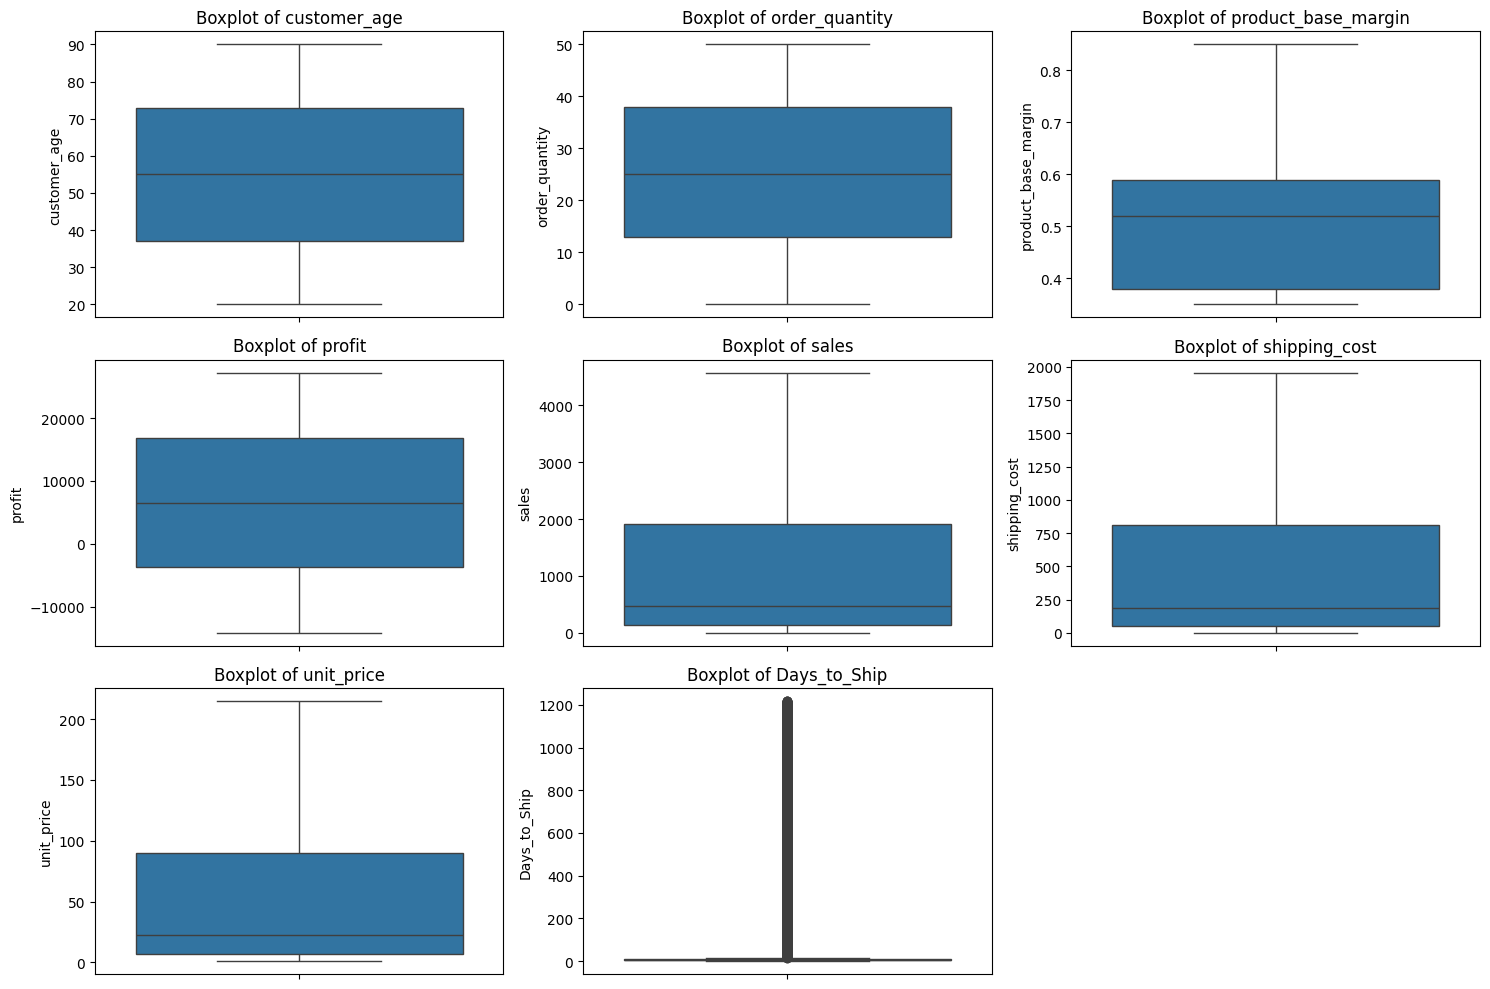

In [41]:
#Univariate Analysis for Numerical Features
numerical_cols = walmart_dataset.select_dtypes(include=['number']).columns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(walmart_dataset[col], kde=True)  # KDE for density estimation
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=walmart_dataset[col])  # Vertical boxplots
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


3.2 Bivariate Analysis :Analyzing  the relationship between two variables




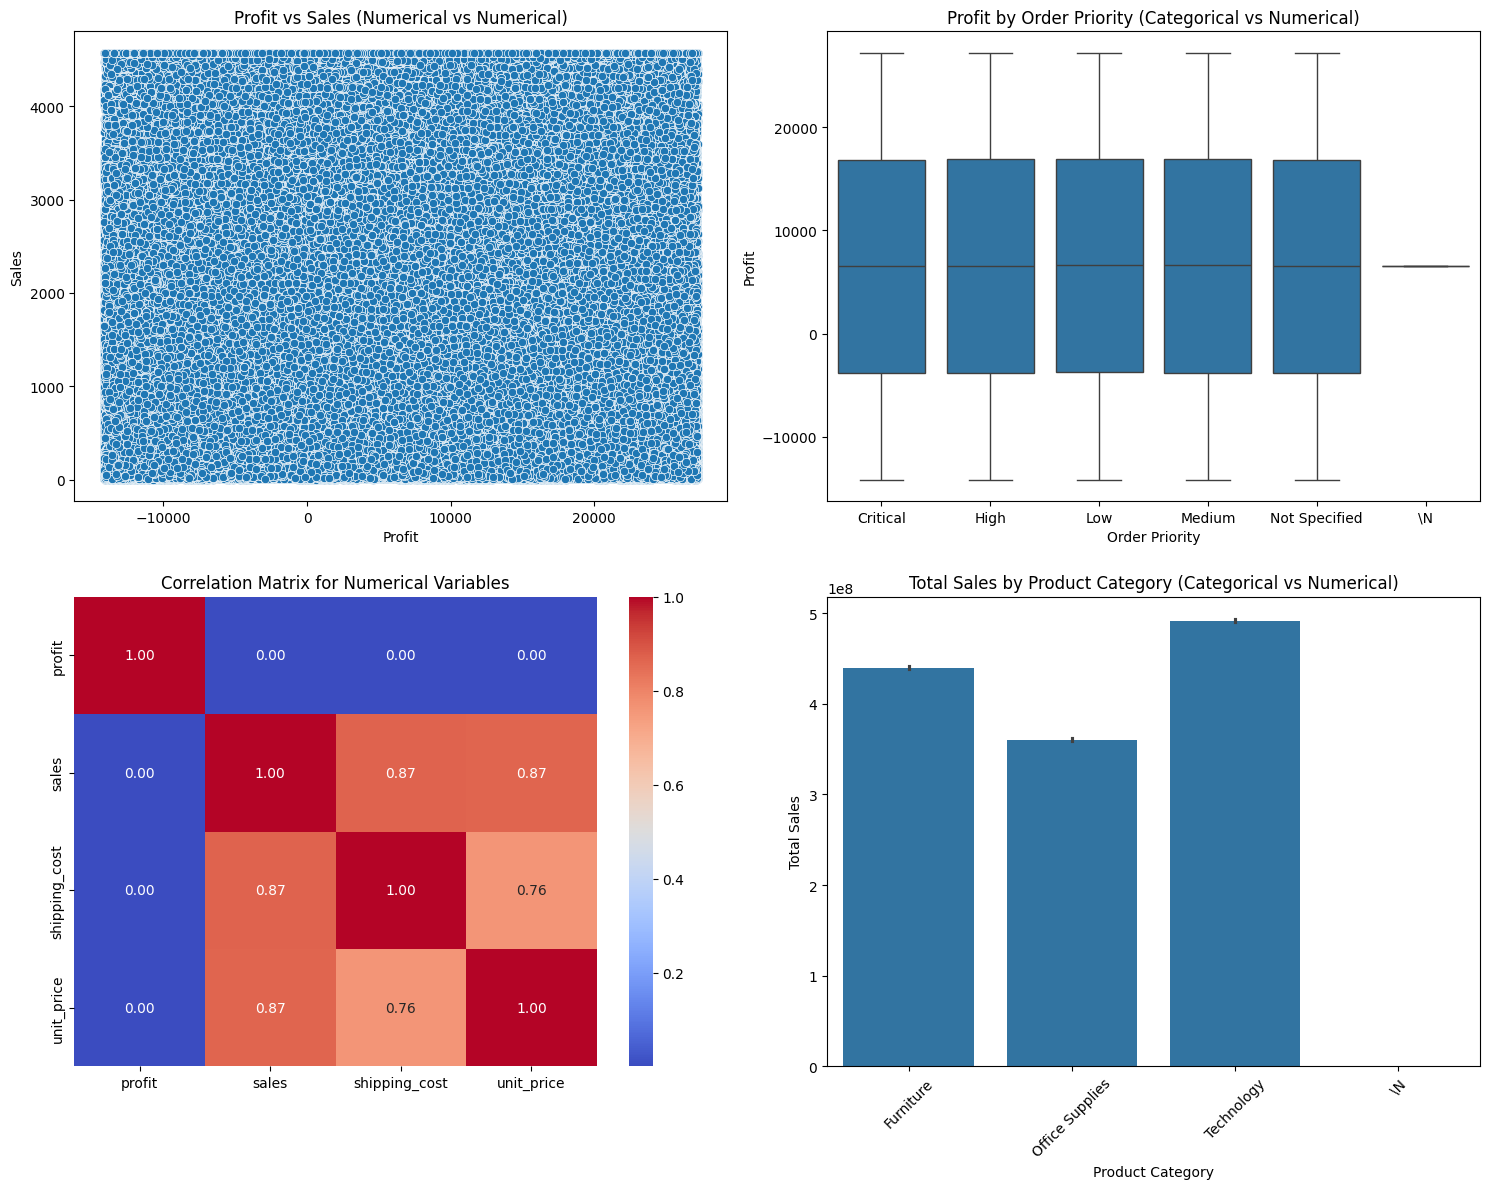

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up the figure with a 2x2 grid
plt.figure(figsize=(15, 12))

#Scatter Plot for Numerical vs Numerical
plt.subplot(2, 2, 1)
sns.scatterplot(x='profit', y='sales', data=walmart_dataset)
plt.title('Profit vs Sales (Numerical vs Numerical)')
plt.xlabel('Profit')
plt.ylabel('Sales')

# Box Plot for Categorical vs Numerical (Order Priority vs Profit)
plt.subplot(2, 2, 2)
sns.boxplot(x='order_priority', y='profit', data=walmart_dataset)
plt.title('Profit by Order Priority (Categorical vs Numerical)')
plt.xlabel('Order Priority')
plt.ylabel('Profit')

# Heatmap for Correlation Matrix (Numerical Variables)
plt.subplot(2, 2, 3)
correlation_matrix = walmart_dataset[['profit', 'sales', 'shipping_cost', 'unit_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')

# Bar Plot for Categorical vs Numerical (Product Category vs Sales)
plt.subplot(2, 2, 4)
sns.barplot(x='product_category', y='sales', data=walmart_dataset, estimator='sum')
plt.title('Total Sales by Product Category (Categorical vs Numerical)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


C. Multivariate Analysis

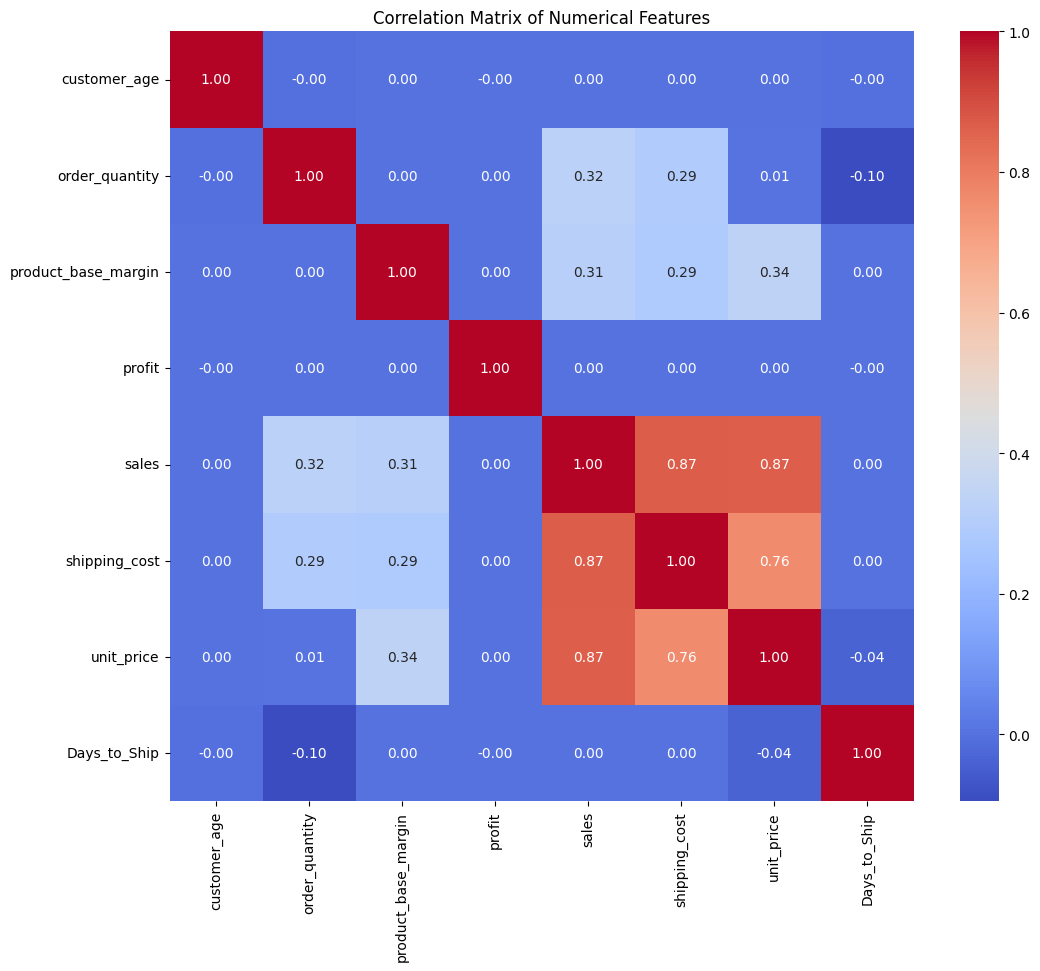

In [43]:
# Correlation Matrix Heatmap for  only numerical columns for correlation analysis
numerical_data = walmart_dataset.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# EDA Summary
1.Univariate Analysis
- Visualised the distribution of numerical features by using histograms and box plots.
-This provides an indication of central tendency, dispersion, and possible skewness of each variable.

2. Bivariate Analysis:
 - Studied the relationships of variables by using scatter plots (numerical vs. numerical),box plots (categorical vs. numerical), a heatmap of the correlation matrix, and bar plots (categorical vs. numerical).  Provides various relations of sales, profit, order priority, and product category.

3. Multivariate Analysis:
 - Provided the Heatmap of the Correlation Matrix for all numeric variables to understand multiple variable relationships. Highlights the various correlations between different numerical features.
